## Importer des packages et des sources textuelle

In [38]:
import re
import pandas as pd 
import os # permet de communiquer avec le système d'exploitation
os.chdir("/home/phammaianh95") # on fixe le répertoire de travail
chemin1 = "Cathy.txt" # texte 1 est les témoins de Cathy 
chemin2 = "Ema.txt" # texte 2 est les témoins d'Ema
chemin3 = "Mathilde.txt" # texte 3 est les témoins de Mathilde

f1=open(chemin1,"r")   
textebrut1 = f1.read()
f2=open(chemin2,"r")   
textebrut2 = f2.read()
f3=open(chemin3,"r")   
textebrut3 = f3.read()

## Créer une liste des paragraphes pour chaque texte

In [39]:
# Texte 1
textchaine1 = re.sub(r"[.:""’‘''“”() –—;,?=!]+"," ",textebrut1)
# remplacement de la ponctuation par des blancs, dont les retours à la ligne
textchaine1.lower() 
# conversion toutes les lettres en minuscules
list1 = textchaine1.lower().split("\n") 
# on passe d'un texte unique à une liste de paragraphes identifiés par le séparateur "retour de lignes"

In [40]:
# On fait la même chose avec le texte 2
textchaine2 = re.sub(r"[.:""’‘''“”() –—;,?=!]+"," ",textebrut2)
textchaine2.lower()
list2 = textchaine2.lower().split("\n")

In [41]:
# et le texte 3
textchaine3 = re.sub(r"[.:""’‘''“”() –—;,?=!]+"," ",textebrut3)
textchaine3.lower()
list3 = textchaine3.lower().split("\n")

## Utiliser le dictionnaire

In [42]:
# Importer le dictionnaire 
dico=pd.read_csv("/home/phammaianh95/Dictionary.csv")

### Texte 1

In [43]:
# Parcourir les mots la liste des paragraphes de Cathy
list1_eclate=[]
list1_complet=[]
for i, phrase in enumerate(list1): #enumerate permet de parcourir une liste avec un indice en +
    for mot in phrase.split(' '):
        list1_complet.append(phrase)
        list1_eclate.append(mot)

list1_eclate=pd.DataFrame({'text':list1_complet,'mot_d':list1_eclate})

# Fusionner ce dataframe avec le dictionnaire
fusion1=pd.merge(list1_eclate,dico,left_on='mot_d',right_on='Word')

liste1_var=fusion1.columns[3:] # Définir les indexes des colonnes des thèmes
liste1_nvar=fusion1.columns[:2]
fusion1.to_csv('Cathy_dict_mots.csv') 

fusion1=fusion1.groupby(['text'],as_index=False)[liste1_var].sum()
fusion1.to_csv('Cathy_dict.csv')
fusion1 # 26 paragraphes et 11 thèmes

,text,Queer,Lesbian,Family,Religion,Out,Sorority,Relationship,Hetero,Violence,Profession,Identity
0,cc coming out at this time with all this suppo...,0.0,2.0,1.0,0.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0
1,cc i got the idea to be a documentary photogra...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0
2,cc i was living in berkeley i had moved there ...,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0
3,cc i worked part-time driving a delivery truck...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,cc kate was in charge but we helped and i was ...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,cc now my home is at strawberry creek lodge in...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
6,cc oh yeah in our lesbian mothers group probab...,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
7,cc somewhat there were gay men who volunteered...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
8,cc that i and other lesbian mothers had the po...,0.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
9,cc this was an apartment that was on a busy st...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Le coming-out de Cathy : le paragraphe du thème "out"
cathy_out = fusion1[fusion1["Out"] > 2.0]
cathy_out # Remarque : un lien fort avec la sororité

,text,Queer,Lesbian,Family,Religion,Out,Sorority,Relationship,Hetero,Violence,Profession,Identity
0,cc coming out at this time with all this suppo...,0.0,2.0,1.0,0.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# La vie pro de Cathy
cathy_pro = fusion1[fusion1["Profession"] > 1.0]
cathy_pro # Remarque : elle semble lié à la sororité également 

,text,Queer,Lesbian,Family,Religion,Out,Sorority,Relationship,Hetero,Violence,Profession,Identity
1,cc i got the idea to be a documentary photogra...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0
2,cc i was living in berkeley i had moved there ...,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0
3,cc i worked part-time driving a delivery truck...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
5,cc now my home is at strawberry creek lodge in...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
11,cc yes i do and i used it recently in an exhib...,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0
14,kate and i were both from upper middle class b...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0
21,the other problem that kind of got in my way w...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0
24,toward the end of the 60s several sncc women s...,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,2.0,0.0
25,we wanted to present ourselves as women to be ...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0


In [46]:
fusion1['Sorority'].sum() # Calculer le nombre total que les mots du thème sororité sont affichés

36.0

In [47]:
fusion1['Profession'].sum() # Nombre d'effichage des mots du thème profession dans le texte

27.0

In [48]:
fusion1['Profession'].value_counts()
# Nombre d'effichage des mots du thème profession dans les 26 paragraphes

0.0    13
2.0     6
1.0     4
3.0     2
5.0     1
Name: Profession, dtype: int64

In [49]:
tab2=pd.crosstab(fusion1['Sorority'],fusion1['Profession'])
tab2 # Crosstab table de ces 2 thèmes

Profession,0.0,1.0,2.0,3.0,5.0
Sorority,,,,,
0.0,5,4,1,1,0
1.0,1,0,2,0,1
2.0,5,0,1,0,0
3.0,0,0,2,0,0
4.0,1,0,0,1,0
6.0,1,0,0,0,0


In [50]:
# La vie familliale de Cathy
fusion1['Family'].value_counts()
# Remarque : La famille est assez importante pour Cathy (12/26 paragraphes parlent de la famille)

0.0    14
1.0     8
2.0     2
3.0     1
6.0     1
Name: Family, dtype: int64

In [51]:
# La vie familliale de Cathy 
cathy_fam = fusion1[fusion1["Family"] > 1.0]
cathy_fam # Remarque : le lien avec le lesbianism, la sororité et queer (sens de communauté)

,text,Queer,Lesbian,Family,Religion,Out,Sorority,Relationship,Hetero,Violence,Profession,Identity
6,cc oh yeah in our lesbian mothers group probab...,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
8,cc that i and other lesbian mothers had the po...,0.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
12,guthrie was kate s son by a former marriage hi...,0.0,2.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
13,it was a man from that childcare group that i ...,3.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [52]:
tab3=pd.crosstab(fusion1['Queer'],fusion1['Family'])
tab3 # Crosstable queer-family

Family,0.0,1.0,2.0,3.0,6.0
Queer,,,,,
0.0,11,8,1,1,1
1.0,3,0,0,0,0
3.0,0,0,1,0,0


In [53]:
fam_tab3=pd.crosstab(fusion1['Lesbian '],fusion1['Family'])
fam_tab3 # Crosstable lesbian-family

Family,0.0,1.0,2.0,3.0,6.0
Lesbian,,,,,
0.0,12,4,0,0,0
1.0,2,2,2,1,0
2.0,0,2,0,0,1


### Texte 2

In [54]:
# Parcourir les mots la liste des paragraphes d'Ema
list2_eclate=[]
list2_complet=[]
for i, phrase in enumerate(list2): #enumerate permet de parcourir une liste avec un indice en +
    for mot in phrase.split(' '):
        list2_complet.append(phrase)
        list2_eclate.append(mot)

In [55]:
# Créer un dataframe des paragraphes et des mots dans cette liste
list2_eclate=pd.DataFrame({'text':list2_complet,'mot_d':list2_eclate})
# Fusionner ce dataframe avec le dictionnaire
fusion2=pd.merge(list2_eclate,dico,left_on='mot_d',right_on='Word')
fusion2.columns # Afficher les noms de colonnes pour vérifier 

Index(['text', 'mot_d', 'Word', 'Queer', 'Lesbian ', 'Family', 'Religion',
       'Out', 'Sorority', 'Relationship', 'Hetero', 'Violence', 'Profession',
       'Identity'],
      dtype='object')

In [56]:
liste2_var=fusion2.columns[3:] # Définir les indexes des colonnes des thèmes, ça sera utile pour la prochaine étape
liste2_nvar=fusion2.columns[:2]
fusion2 # Afficher
fusion2.to_csv('Ema_dict_mots.csv')

In [57]:
# Le nombre de mots par thème (colonnes) dans chaque paragraphe (lignes)
fusion2=fusion2.groupby(['text'],as_index=False)[liste2_var].sum()
fusion2 # 8 paragraphes, la relation est importante

,text,Queer,Lesbian,Family,Religion,Out,Sorority,Relationship,Hetero,Violence,Profession,Identity
0,a university student who often gets mistaken a...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0
1,as young activists and community organizers we...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
2,despite not having as much freedom as she dese...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
3,ema makes daily decisions on when to come out ...,2.0,2.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,1.0
4,ema struggled with her catholic faith when she...,0.0,1.0,0.0,5.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
5,eventually the two women came to accept their ...,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0
6,growing up ema first realized she was gay thro...,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,unfortunately progress is still slow for gay r...,2.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,5.0,1.0,0.0


In [71]:
list2

['ema_indo',
 'a university student who often gets mistaken around town for a boy ema challenges ideals of femininity in indonesia ema meets us at a cafe with her girlfriend and we recognize that the couple is reserved about displaying public affection but speaking to them and learning about the sacrifices they ve made for each other we can tell they are deeply in love while her girlfriend declines an interview for safety reasons they re very enthusiastic to meet with another lesbian couple and share their experience ',
 'as young activists and community organizers we recognize that ema photo right and her partner are the supergays of their community they wear t-shirts from their organization peace generation which uses film art and political demonstrations to communicate messages of peace in a country that still runs high with ethnic and social tensions ',
 'growing up ema first realized she was gay through international role models she says i realized it in junior high school i was 1

In [60]:
# Sa vie professionnelle et l'homophobie
tab4=pd.crosstab(fusion2['Queer'],fusion2['Profession'])
tab4

Profession,0.0,1.0,2.0
Queer,,,
0.0,3,0,1
1.0,1,1,0
2.0,1,1,0


### Texte 3

In [64]:
# Parcourir les mots la liste des paragraphes de Mathilde
list3_eclate=[]
list3_complet=[]
for i, phrase in enumerate(list3): #enumerate permet de parcourir une liste avec un indice en +
    for mot in phrase.split(' '):
        list3_complet.append(phrase)
        list3_eclate.append(mot)

list3_eclate=pd.DataFrame({'text':list3_complet,'mot_d':list3_eclate})

# Fusionner ce dataframe avec le dictionnaire
fusion3=pd.merge(list3_eclate,dico,left_on='mot_d',right_on='Word')

liste3_var=fusion3.columns[3:] # Définir les indexes des colonnes des thèmes, ça sera utile pour la prochaine étape
liste3_nvar=fusion3.columns[:2]
fusion3.to_csv('Mathilde_dict_mots.csv')

fusion3=fusion3.groupby(['text'],as_index=False)[liste3_var].sum()
fusion3

,text,Queer,Lesbian,Family,Religion,Out,Sorority,Relationship,Hetero,Violence,Profession,Identity
0,will the transition hurt - i asked mathilde o...,2.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0
1,for this seminar on the theme of embodiment i ...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,let me introduce my girlfriend first mathilde ...,0.0,1.0,6.0,4.0,3.0,0.0,1.0,0.0,0.0,7.0,0.0
3,mathilde and i have only been together for 4 m...,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,2.0,0.0
4,she s been there before it was that time when ...,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0


In [67]:
# Le coming-out de Mathilde : le paragraphe du thème "out"
mt_out = fusion3[fusion3["Out"] > 2.0]
mt_out
# Remarque : un lien fort avec la vie pro et la famille

,text,Queer,Lesbian,Family,Religion,Out,Sorority,Relationship,Hetero,Violence,Profession,Identity
2,let me introduce my girlfriend first mathilde ...,0.0,1.0,6.0,4.0,3.0,0.0,1.0,0.0,0.0,7.0,0.0


In [73]:
mt_violence = fusion3[fusion3["Violence"] > 1.0]
mt_violence # Remarque : la violence vient pas de la religion ou des hétéro, mais entre lesbiennes et queer

,text,Queer,Lesbian,Family,Religion,Out,Sorority,Relationship,Hetero,Violence,Profession,Identity
3,mathilde and i have only been together for 4 m...,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,2.0,0.0
4,she s been there before it was that time when ...,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0


# LEMMATISATION

In [1]:
# J'ai fait la lemmatisation dans l'ordinateur de la fac et j'ai télécharger le fichier csv
import pandas as pd
cathy_lem=pd.read_csv("/home/phammaianh95/Cathy_lem.csv")

<AxesSubplot:>

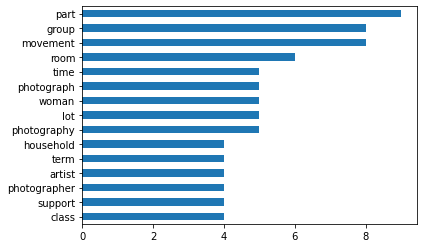

In [3]:
cathy_nn = cathy_lem[cathy_lem["POS"] == "NN"]
cathy_nn.Lemmes.value_counts().nlargest(15).sort_values().plot(kind = 'barh')

<AxesSubplot:>

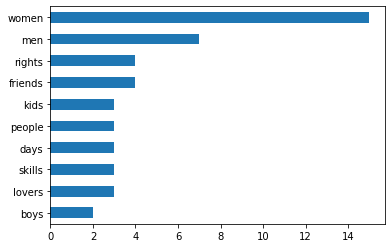

In [6]:
cathy_nns = cathy_lem[cathy_lem["POS"] == "NNS"]
cathy_nns.Graphies.value_counts().nlargest(10).sort_values().plot(kind = 'barh')